<a href="https://colab.research.google.com/github/BureddySaiPoojitha/Module6_Lab1_AIML_-/blob/main/MODULE6_LAB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**STUDENT TRAININIG PROGRAM ON AIML AT IIITH HYDERABAD**

# **MODULE 6 LAB-1 :- NEURAL NETWORK-1**

# Implementing forward propagation and back propagation

In [1]:
import torch
import torch.nn as nn

In [2]:
from sklearn import datasets
from sklearn import preprocessing
iris = datasets.load_iris()
X = torch.tensor(preprocessing.normalize(iris.data[:, :3]), dtype=torch.float)
y = torch.tensor(iris.target.reshape(-2, 2), dtype=torch.float)

In [3]:
# Set manual seed
torch.manual_seed(3)

In [4]:
print(X.size())
print(y.size())

torch.Size([150, 3])
torch.Size([75, 2])


In [5]:
# Take 2 classes in order to get binary classification problem
X = X[:y[y < 3].size()[0]]
y = y[:y[y < 3].size()[0]]

In [6]:
print(X.size())
print(y.size())

torch.Size([150, 3])
torch.Size([75, 2])


In [7]:
print(torch.randn(5, 52).size())

torch.Size([5, 52])


In [8]:
class FNN(nn.Module):
    def __init__(self, ):
        super().__init__()
        self.input_dim = 5
        self.hidden_dim = 52
        self.output_dim = 1
        self.learning_rate = 0.003
        self.w1 = torch.randn(self.input_dim, self.hidden_dim)
        self.w2 = torch.randn(self.hidden_dim, self.output_dim)

    def sigmoid(self, s):
        return 1 / (1 + torch.exp(-s))

    def sigmoid_first_order_derivative(self, s):
        return s * (1 - s)

    # Forward propagation
    def forward(self, X):
        self.y1 = torch.matmul(X, self.w1)
        self.y2 = self.sigmoid(self.y1)
        self.y3 = torch.matmul(self.y2, self.w2)
        y4 = self.sigmoid(self.y3)
        return y4

    # Backward propagation
    def backward(self, X, l, y4):
        self.dC_dy4 = y4 - l

        '''
        Gradients for w2: partial derivative of cost w.r.t. w2
        dC/dw2
        '''
        self.dy4_dy3 = self.sigmoid_first_order_derivative(y4)
        self.dy3_dw2 = self.y2

        # Y4 delta: dC_dy4 dy4_dy3
        self.y4_delta = self.dC_dy4 * self.dy4_dy3

        self.dC_dw2 = torch.matmul(torch.t(self.dy3_dw2), self.y4_delta)

        '''
        Gradients for w1: partial derivative of cost w.r.t w1
        dC/dw1
        '''
        self.dy3_dy2 = self.w2
        self.dy2_dy1 = self.sigmoid_first_order_derivative(self.y2)
        self.y2_delta = torch.matmul(self.y4_delta, torch.t(self.dy3_dy2)) * self.dy2_dy1
        self.dC_dw1 = torch.matmul(torch.t(X), self.y2_delta)
        self.w1 -= self.learning_rate * self.dC_dw1
        self.w2 -= self.learning_rate * self.dC_dw2
    def train(self, X, l):
        # Forward propagation
        y4 = self.forward(X)
        # Backward propagation and gradient descent
        self.backward(X, l, y4)

In [16]:
model = FNN()
loss_lst = []
num_epochs = 115

for epoch in range(num_epochs):
    y_hat = model(X)

    # Binary Cross Entropy Loss for binary classification
    cross_entropy_loss = -(y * torch.log(y_hat) + (1 - y) * torch.log(1 - y_hat))

    mean_cross_entropy_loss = torch.mean(cross_entropy_loss).detach().item()
    if epoch % 20 == 0:
        print('Epoch {} | Loss: {}'.format(epoch, mean_cross_entropy_loss))
    loss_lst.append(mean_cross_entropy_loss)

    model.train(X, y)


Epoch 0 | Loss: 2.8681459426879883
Epoch 20 | Loss: 2.792875051498413
Epoch 40 | Loss: 2.704561710357666
Epoch 60 | Loss: 2.5977959632873535
Epoch 80 | Loss: 2.462944984436035
Epoch 100 | Loss: 2.2802693843841553


<Axes: >

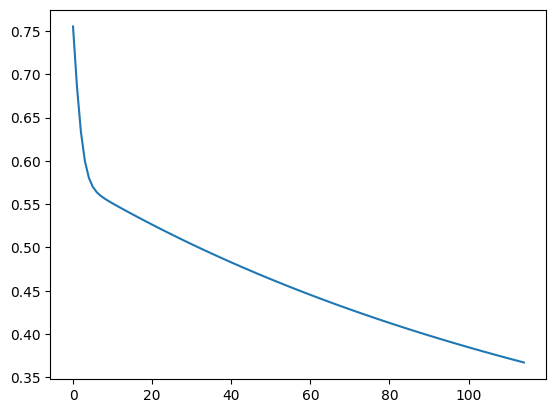

In [14]:
# Plotting loss
import pandas as pd
%matplotlib inline
pd.Series(loss_lst).plot()